# Imports

In [1]:
import os
import cv2

from osgeo import gdal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

from PIL import Image

2023-05-23 13:42:54.482057: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 13:42:54.516406: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 13:42:54.517433: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 13:42:55.255235: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Connect to data on local drive & assign working folder

In [2]:
# Function to recursively search for the "data" folder
def find_data_folder(directory):
    for root, dirs, files in os.walk(directory):
        if 'data' in dirs:
            return os.path.join(root, 'data')
    return None

# Specify the target directory name
target_directory = 'AerialImageDataset'

# Get the user's home directory
home_dir = os.path.expanduser('~')

# Search for the "data" folder recursively
data_folder = find_data_folder(home_dir)

if data_folder is None:
    print("Could not find the 'data' folder.")
else:
    # Construct the absolute path by joining the data folder path with the target directory
    absolute_path = os.path.join(data_folder, target_directory)
    print(absolute_path)

/home/abhinav/code/JennyF-slb/solar_ai/data/AerialImageDataset


In [3]:
# Change the current working directory
os.chdir(absolute_path)

In [4]:
# Check working folder
!pwd

/home/abhinav/code/JennyF-slb/solar_ai/data/AerialImageDataset


# Testing folder paths and Images

In [5]:
def list_folder_tree(folder_path):
    for root, dirs, _ in os.walk(folder_path):
        if os.path.basename(root) != '.ipynb_checkpoints':
            level = root.replace(folder_path, '').count(os.sep)
            indent = ' ' * 4 * (level)
            print('{}{}/'.format(indent, os.path.basename(root)))

# Provide the path to your project data folder
folder_path = absolute_path

# Call the function to list the folder tree
list_folder_tree(folder_path)

AerialImageDataset/
    train/
        images/
        gt/
    test/
        images/


## train / images : geo-tiff Images

In [6]:
# Construct the absolute path to the "train/images" directory
train_images_dir = absolute_path + '/train/images/'

# Retrieve a list of files in the "train/images" directory
files = os.listdir(train_images_dir)

# Filter files based on criteria (e.g., file extension)
image_files = [file for file in sorted(files) if file.endswith('.tif')]

# Select a specific image from the list
selected_image = image_files[179]  # Change the index as per your requirement
selected_image

'vienna9.tif'

In [7]:
# Load the selected image
image_path = train_images_dir + selected_image
image = Image.open(image_path)

# Get the shape of the image
image_shape = image.size

# Print the shape
print("Image shape:", image_shape)

Image shape: (5000, 5000)


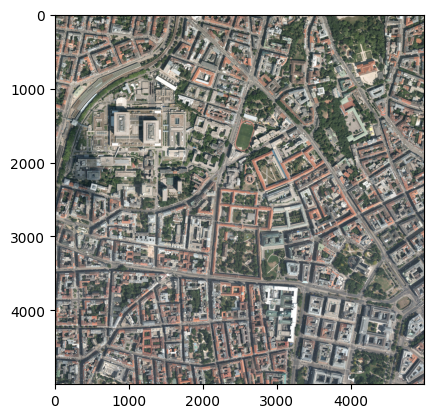

In [8]:
plt.imshow(image)

## train / images : tg Images

In [9]:
# Construct the absolute path to the "train/gt" directory
gt_images_dir = absolute_path + '/train/gt/'

# Retrieve a list of files in the "train/gt" directory
gt_files = os.listdir(gt_images_dir)

# Filter files based on criteria (e.g., file extension)
gt_image_files = [file for file in sorted(gt_files) if file.endswith('.tif')]

# Select a specific gt image from the list
selected_gt = gt_image_files[179]  # Change the index as per your requirement
selected_gt

'vienna9.tif'

In [10]:
# Load the selected gt image
gt_image_path = gt_images_dir + selected_gt
gt_image = Image.open(gt_image_path)

# Get the shape of the image
gt_image_shape = gt_image.size

# Print the shape
print("gt_image shape:", gt_image_shape)

gt_image shape: (5000, 5000)


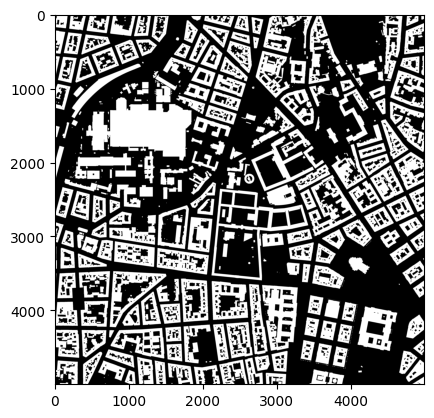

In [11]:
plt.imshow(gt_image, cmap='gray')

# Data load testing with gdal for geo-tiff images

In [12]:
# Load GeoTIFF file
checking = gdal.Open(image_path,0)

In [13]:
checking_gt = gdal.Open(gt_image_path,0)

In [14]:
c_image = checking.ReadAsArray()
c_image.shape

(3, 5000, 5000)

In [15]:
c_gt = checking_gt.ReadAsArray()
c_gt.shape

(5000, 5000)

In [16]:
c_image = np.transpose(c_image,(1,2,0))
c_image.shape

(5000, 5000, 3)

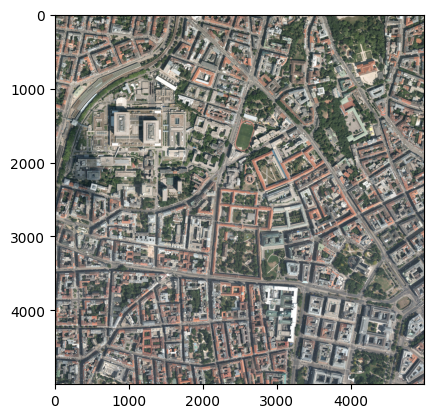

In [17]:
plt.imshow(c_image)

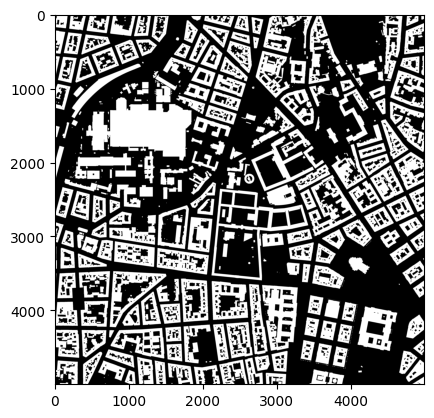

In [18]:
plt.imshow(c_gt, cmap = 'gray')

In [19]:
c_image = cv2.resize(c_image, (256, 256))

In [20]:
c_gt = cv2.resize(c_gt, (256, 256))

In [21]:
c_image.shape

(256, 256, 3)

In [22]:
c_gt.shape

(256, 256)

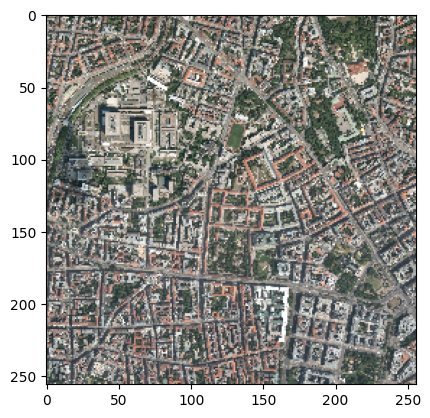

In [23]:
plt.imshow(c_image)

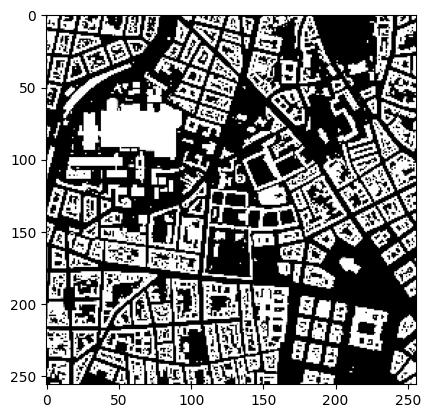

In [24]:
plt.imshow(c_gt,cmap= 'gray')

In [25]:
c_image = c_image / 255 # Normalize pixel values between 0 and 1

In [26]:
c_gt = c_gt / 255 # Normalize pixel values between 0 and 1

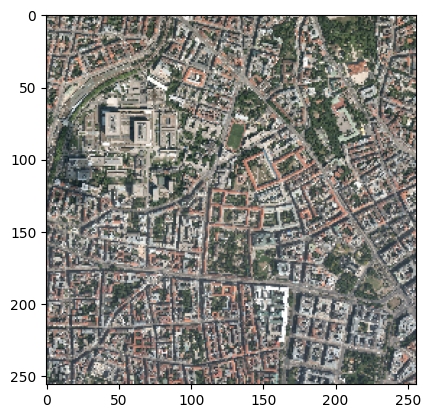

In [27]:
plt.imshow(c_image)

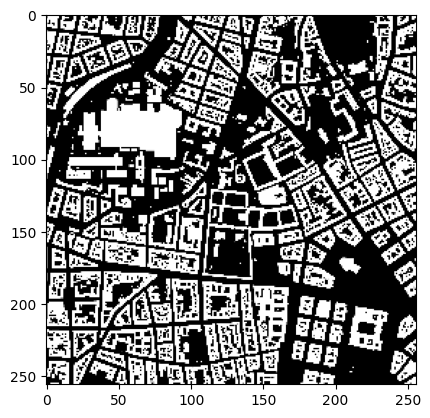

In [28]:
plt.imshow(c_gt, cmap='gray')